# AST 7939 Week 8

### Deep Neural Networks

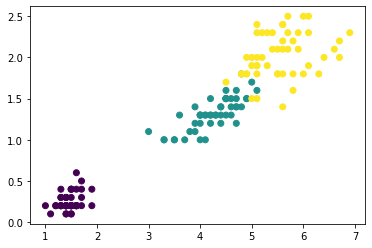

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt 

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = iris.target

plt.scatter(X[:,0],X[:,1],c=y)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
X_train.shape

(112, 2)

In [4]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = StandardScaler().fit(X_train).transform(X_test)

### Let's build our first neural network. We will use sklearn's MLPClassifier

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity

In [7]:
model = MLPClassifier(hidden_layer_sizes=(100,100),activation="relu",
                      max_iter=1000,random_state=1,verbose=1)

model.fit(X_train_scaled, y_train)

y_pred=model.predict(X_test_scaled)
print(model.score(X_test_scaled, y_test))

Iteration 1, loss = 1.22897473
Iteration 2, loss = 1.17946500
Iteration 3, loss = 1.13225208
Iteration 4, loss = 1.08798588
Iteration 5, loss = 1.04608248
Iteration 6, loss = 1.00658002
Iteration 7, loss = 0.96930321
Iteration 8, loss = 0.93406316
Iteration 9, loss = 0.90028484
Iteration 10, loss = 0.86750427
Iteration 11, loss = 0.83587758
Iteration 12, loss = 0.80565523
Iteration 13, loss = 0.77704118
Iteration 14, loss = 0.74996988
Iteration 15, loss = 0.72432527
Iteration 16, loss = 0.69972983
Iteration 17, loss = 0.67601840
Iteration 18, loss = 0.65329978
Iteration 19, loss = 0.63138212
Iteration 20, loss = 0.61012130
Iteration 21, loss = 0.58965631
Iteration 22, loss = 0.57009024
Iteration 23, loss = 0.55148502
Iteration 24, loss = 0.53393829
Iteration 25, loss = 0.51720953
Iteration 26, loss = 0.50121006
Iteration 27, loss = 0.48580969
Iteration 28, loss = 0.47095097
Iteration 29, loss = 0.45658959
Iteration 30, loss = 0.44272659
Iteration 31, loss = 0.42934290
Iteration 32, los

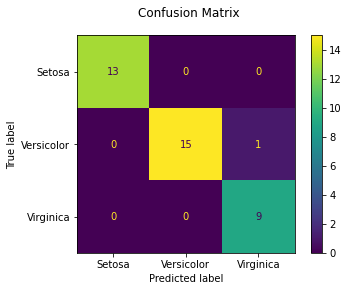

In [8]:
from sklearn.metrics import plot_confusion_matrix

fig=plot_confusion_matrix(model, X_test_scaled, y_test,display_labels=["Setosa","Versicolor","Virginica"])
fig.figure_.suptitle("Confusion Matrix")
plt.show()

In [9]:
model.predict_proba(X_test_scaled)

array([[2.96826712e-05, 5.58582618e-04, 9.99411735e-01],
       [4.67674808e-03, 9.91826979e-01, 3.49627262e-03],
       [9.98464698e-01, 1.37220172e-03, 1.63100174e-04],
       [4.02487097e-05, 1.56964843e-03, 9.98390103e-01],
       [9.98117840e-01, 1.69176535e-03, 1.90394457e-04],
       [2.42419682e-06, 2.62080541e-05, 9.99971368e-01],
       [9.98103316e-01, 1.71108518e-03, 1.85598638e-04],
       [3.21786920e-03, 8.70071557e-01, 1.26710574e-01],
       [3.03947768e-03, 9.12867415e-01, 8.40931074e-02],
       [2.62300726e-03, 9.92711501e-01, 4.66549152e-03],
       [1.93714461e-03, 2.66602509e-01, 7.31460347e-01],
       [2.84983940e-03, 9.39308349e-01, 5.78418115e-02],
       [2.26456361e-03, 9.84891619e-01, 1.28438176e-02],
       [3.04310427e-03, 9.11325677e-01, 8.56312189e-02],
       [2.83396267e-03, 9.41402066e-01, 5.57639709e-02],
       [9.98917721e-01, 9.56609733e-04, 1.25669120e-04],
       [2.84983940e-03, 9.39308349e-01, 5.78418115e-02],
       [2.26653366e-03, 9.92083

In [10]:
print(model.coefs_[0].shape, model.coefs_[1].shape, model.coefs_[2].shape)

(2, 100) (100, 100) (100, 3)


In [11]:
model.coefs_[0]

array([[-1.77035229e-02,  1.79912983e-01, -2.69376812e-01,
        -6.64179892e-02, -4.07818179e-02, -2.73692186e-01,
        -2.20854359e-01, -1.85376873e-02,  4.06766635e-02,
         7.70989385e-02, -5.63063331e-02,  1.21759656e-01,
         1.10468866e-02,  2.66045293e-01, -1.93707553e-01,
         1.68877628e-01, -1.14943524e-03,  6.52204001e-02,
        -2.17006201e-01, -2.24922974e-01,  3.95419546e-02,
         2.01778485e-01, -1.73994834e-01,  1.75892283e-02,
         2.82931605e-01,  2.68454078e-01, -2.61530483e-01,
        -2.39325161e-01, -1.25654863e-01,  2.45026380e-01,
        -2.83244862e-01, -1.94964423e-02,  2.72843463e-01,
         3.43801319e-02,  1.02442323e-01, -1.61383018e-01,
         2.10371745e-01,  2.14032083e-01, -3.51489736e-01,
         1.27694018e-01,  3.46020276e-01,  9.50938604e-02,
        -1.04466381e-01,  3.62653720e-02, -2.11061730e-01,
        -6.93057764e-02,  7.46248874e-02, -1.07171368e-01,
        -8.46621079e-02, -2.40982100e-01, -3.11881004e-0

In [12]:
print(model.intercepts_[0].shape, model.intercepts_[1].shape, model.intercepts_[2].shape)

(100,) (100,) (3,)


In [13]:
model.intercepts_[0]

array([ 0.2845382 ,  0.08187597,  0.22488755,  0.16163273, -0.00568267,
        0.0019831 ,  0.06848635,  0.0665683 ,  0.30619666,  0.28934678,
       -0.0492854 ,  0.33359282, -0.04823138, -0.11599276, -0.21275853,
        0.03528339, -0.23209456,  0.33149223,  0.22226608, -0.15600645,
       -0.15706789, -0.10857822, -0.11492893,  0.25015997, -0.06293935,
        0.17996933,  0.03668641,  0.26157016,  0.24365538,  0.27335874,
       -0.00193611,  0.12881703,  0.25165281, -0.1218419 , -0.04165124,
        0.07653412, -0.1260693 ,  0.13807613, -0.0254531 ,  0.1969036 ,
       -0.08744901,  0.2435591 ,  0.03906148, -0.15327757,  0.18915975,
        0.11100622, -0.21638579, -0.06128099,  0.18349337,  0.27616406,
       -0.16693658,  0.19370081, -0.02166931,  0.28098367,  0.14994267,
        0.24602814,  0.12804068,  0.04446735, -0.05927085, -0.00722851,
        0.22604677,  0.20632003,  0.13495283,  0.08143851,  0.09588123,
       -0.06048578,  0.04647329, -0.02382964, -0.09945498, -0.03

Text(0, 0.5, 'Training Loss')

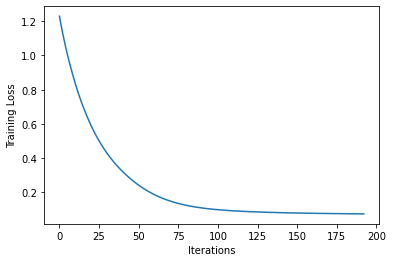

In [14]:
plt.plot(model.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')

### Hyperparameter Optimization

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('sc', StandardScaler()),
    ('mlp', MLPClassifier())
])

param_grid = {
    'mlp__hidden_layer_sizes': [(300,200,100), (150,100,50), (75,50,25)],
    'mlp__max_iter': [100, 200, 300],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__learning_rate': ['constant','adaptive']
}

grid_search = GridSearchCV(pipe, param_grid, return_train_score=True, cv=5, n_jobs=4, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/tensorflow/2.7.0/lib/python3.9/sit

[CV 4/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=100, mlp__solver=sgd;, score=(train=0.811, test=0.773) total time=   1.0s
[CV 4/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=200, mlp__solver=sgd;, score=(train=0.856, test=0.864) total time=   1.9s
[CV 3/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=200, mlp__solver=adam;, score=(train=0.967, test=1.000) total time=   2.1s
[CV 3/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=300, mlp__solver=sgd;, score=(train=0.922, test=0.955) total time=   2.9s
[CV 2/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=300, mlp__solver=adam;, score=(train=0.966, test=0.957) total time=   1.0s
[CV 4/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=300, mlp__solver=adam;, score=(train=0.978, te

/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=100, mlp__solver=sgd;, score=(train=0.697, test=0.696) total time=   0.8s
[CV 1/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=100, mlp__solver=adam;, score=(train=0.955, test=0.957) total time=   0.9s
[CV 4/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=100, mlp__solver=adam;, score=(train=0.978, test=0.955) total time=   1.0s
[CV 2/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=200, mlp__solver=sgd;, score=(train=0.955, test=0.913) total time=   1.9s
[CV 1/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=200, mlp__solver=adam;, score=(train=0.989, test=0.957) total time=   2.1s
[CV 1/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=300, mlp__solver=sgd;, score=(train=0.955, te

/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=100, mlp__solver=sgd;, score=(train=0.933, test=0.913) total time=   0.9s
[CV 5/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=100, mlp__solver=sgd;, score=(train=0.711, test=0.773) total time=   0.9s
[CV 3/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=100, mlp__solver=adam;, score=(train=0.956, test=1.000) total time=   1.0s
[CV 1/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=200, mlp__solver=sgd;, score=(train=0.921, test=0.913) total time=   1.9s
[CV 5/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=200, mlp__solver=sgd;, score=(train=0.922, test=0.955) total time=   2.0s
[CV 5/5] END mlp__hidden_layer_sizes=(300, 200, 100), mlp__learning_rate=constant, mlp__max_iter=200, mlp__solver=adam;, score=(train=1.000, tes

/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/apps/tensorflow/2.7.0/lib/python3.9/sit

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('mlp', MLPClassifier())]),
             n_jobs=4,
             param_grid={'mlp__hidden_layer_sizes': [(300, 200, 100),
                                                     (150, 100, 50),
                                                     (75, 50, 25)],
                         'mlp__learning_rate': ['constant', 'adaptive'],
                         'mlp__max_iter': [100, 200, 300],
                         'mlp__solver': ['sgd', 'adam']},
             return_train_score=True, verbose=3)

In [30]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'mlp__hidden_layer_sizes': (300, 200, 100), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 300, 'mlp__solver': 'sgd'}
Best model: Pipeline(steps=[('sc', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(300, 200, 100), max_iter=300,
                               solver='sgd'))])
Test score: 0.97


### Save and load a model.

In [17]:
import pickle

# save
with open('iris_model.pkl','wb') as f:
    pickle.dump(grid_search.best_estimator_,f)

# load
with open('iris_model.pkl', 'rb') as f:
    model_best = pickle.load(f)

In [18]:
model_best.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('mlp', MLPClassifier(hidden_layer_sizes=(300, 200, 100), max_iter=100))],
 'verbose': False,
 'sc': StandardScaler(),
 'mlp': MLPClassifier(hidden_layer_sizes=(300, 200, 100), max_iter=100),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'mlp__activation': 'relu',
 'mlp__alpha': 0.0001,
 'mlp__batch_size': 'auto',
 'mlp__beta_1': 0.9,
 'mlp__beta_2': 0.999,
 'mlp__early_stopping': False,
 'mlp__epsilon': 1e-08,
 'mlp__hidden_layer_sizes': (300, 200, 100),
 'mlp__learning_rate': 'constant',
 'mlp__learning_rate_init': 0.001,
 'mlp__max_fun': 15000,
 'mlp__max_iter': 100,
 'mlp__momentum': 0.9,
 'mlp__n_iter_no_change': 10,
 'mlp__nesterovs_momentum': True,
 'mlp__power_t': 0.5,
 'mlp__random_state': None,
 'mlp__shuffle': True,
 'mlp__solver': 'adam',
 'mlp__tol': 0.0001,
 'mlp__validation_fraction': 0.1,
 'mlp__verbose': False,
 'mlp__warm_start': False}

In [19]:
model_best.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [20]:
model_best.score(X_test, y_test)

0.9736842105263158

### Instead of sklearn's MLP classifier, we can use Keras implemented onto Tensorflow. You will have to choose a Tensorflow kernel on hipergator.


Keras: https://keras.io/

Tensorflow: https://www.tensorflow.org/

In [5]:
np.unique(y).shape[0]

3

In [6]:
import tensorflow.keras as keras

# Initialize a model.
model = keras.models.Sequential()

# Add the input layer and specifying its shape.
model.add(keras.layers.Input(shape=X_train.shape[1]))

# Add the first hidden layer with 100 neurons and the ReLU activation function.
model.add(keras.layers.Dense(100, activation='relu'))

# Add the second hidden layer with 100 neurons and the ReLU activation function.
model.add(keras.layers.Dense(100, activation='relu'))

# Add the output layer
# softmax normalizes the output to a probability distribution
model.add(keras.layers.Dense(np.unique(y).shape[0], activation='softmax'))

2023-04-14 19:08:07.365979: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 19:08:07.926633: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 359 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0


### We can use the following syntax instead.

In [7]:
model = keras.models.Sequential()

# This line combines the input layer and the first hidden layer.
model.add(keras.layers.Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(np.unique(y).shape[0], activation='softmax'))

### We can also use the following syntax.

In [8]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu',),
    keras.layers.Dense(np.unique(y).shape[0], activation='softmax')
])

### Let's check the "architecture" of our neural network. Note that the input layer does not show up here.

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               300       
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 3)                 303       
                                                                 
Total params: 10,703
Trainable params: 10,703
Non-trainable params: 0
_________________________________________________________________


### We can also have a look at the weights.

In [10]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(2, 100) dtype=float32, numpy=
 array([[ 0.16549486,  0.05862853, -0.06328645, -0.11081287,  0.03292492,
          0.00458217, -0.11528027, -0.11933333,  0.00106202,  0.00486788,
         -0.0294546 , -0.15338896, -0.11516583, -0.12087824, -0.17307618,
          0.15515348, -0.14276958,  0.06055653,  0.24052176, -0.1069933 ,
         -0.12951899, -0.03358163, -0.23264378, -0.1885269 ,  0.15597883,
          0.06721717, -0.1794138 , -0.08361553,  0.12077016,  0.21048954,
          0.03491497, -0.03505531, -0.17397027, -0.13208213,  0.087962  ,
          0.12538442,  0.00772727,  0.0207136 , -0.03900516,  0.02760443,
          0.1803675 ,  0.16820455, -0.14074054, -0.03364635, -0.1377931 ,
          0.1016269 , -0.15500003,  0.23199591, -0.17274761,  0.08022699,
          0.20981967,  0.20648515, -0.21098128,  0.06911823, -0.0267318 ,
         -0.1991556 , -0.06894799, -0.22751494, -0.03350438, -0.10602386,
          0.07925496,  0.2393941 , -0.1358

### Now, we need to "compile" the model before we fit to the data.

Some useful links

Loss functions: https://keras.io/api/losses/ 

Optimizers: https://keras.io/api/optimizers/ 

Metrics: https://keras.io/api/metrics/

In [11]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

### We are ready to train the neural network. Let's start training.

In [12]:
# history will record the loss, accuracy, etc. 
# validation_split will split the training dataset into training + validation datasets. 
history = model.fit(X_train_scaled, y_train, epochs=1000, validation_split=0.2)

Epoch 1/1000


2023-04-14 19:08:25.854828: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2023-04-14 19:08:25.854916: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at matmul_op_impl.h:438 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError:  Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[node sequential_2/dense_6/MatMul
 (defined at /apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/layers/core/dense.py:199)
]] [Op:__inference_train_function_831]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_2/dense_6/MatMul:
In[0] IteratorGetNext (defined at /apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py:866)	
In[1] sequential_2/dense_6/MatMul/ReadVariableOp:

Operation defined at: (most recent call last)
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/__main__.py", line 5, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 724, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
>>>     handle._run()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/asyncio/events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 512, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 501, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 408, in dispatch_shell
>>>     await result
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 731, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 424, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
>>>     return super().run_cell(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
>>>     if await self.run_code(code, result, async_=asy):
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/scratch/local/61848370/ipykernel_64333/299646926.py", line 3, in <cell line: 3>
>>>     history = model.fit(X_train_scaled, y_train, epochs=1000, validation_split=0.2)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 808, in train_step
>>>     y_pred = self(x, training=True)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/sequential.py", line 373, in call
>>>     return super(Sequential, self).call(inputs, training=training, mask=mask)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/layers/core/dense.py", line 199, in call
>>>     outputs = tf.matmul(a=inputs, b=self.kernel)
>>> 

### Note that in each epoch, there are 3 mini batches.

In [13]:
(X_train.shape[0]*0.8)/32

2.8000000000000003

In [14]:
X_train_scaled.shape[0]/32

3.5

### Let's evlauate the model using the test dataset.

In [15]:
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

2023-04-14 19:08:52.488426: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2023-04-14 19:08:52.488484: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at matmul_op_impl.h:438 : INTERNAL: Attempting to perform BLAS operation using StreamExecutor without BLAS support


InternalError:  Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[node sequential_2/dense_6/MatMul
 (defined at /apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/layers/core/dense.py:199)
]] [Op:__inference_test_function_1004]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_2/dense_6/MatMul:
In[0] IteratorGetNext (defined at /apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py:1355)	
In[1] sequential_2/dense_6/MatMul/ReadVariableOp:

Operation defined at: (most recent call last)
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/__main__.py", line 5, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 724, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
>>>     handle._run()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/asyncio/events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 512, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 501, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 408, in dispatch_shell
>>>     await result
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 731, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 424, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
>>>     return super().run_cell(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
>>>     if await self.run_code(code, result, async_=asy):
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/scratch/local/61848370/ipykernel_64333/1893010749.py", line 1, in <cell line: 1>
>>>     loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 1537, in evaluate
>>>     tmp_logs = self.test_function(iterator)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 1366, in test_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 1356, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 1349, in run_step
>>>     outputs = model.test_step(data)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/training.py", line 1303, in test_step
>>>     y_pred = self(x, training=False)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/sequential.py", line 373, in call
>>>     return super(Sequential, self).call(inputs, training=training, mask=mask)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "/apps/tensorflow/2.7.0/lib/python3.9/site-packages/keras/layers/core/dense.py", line 199, in call
>>>     outputs = tf.matmul(a=inputs, b=self.kernel)
>>> 

### Let's check how loss and validation loss evolved over epoch.

In [16]:
plt.plot(history.epoch, history.history['loss'],'.-', label='loss')
plt.plot(history.epoch, history.history['val_loss'],'.-', label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')
plt.legend()

NameError: name 'history' is not defined

### Let's check how accuracy and validation accuracy evolved over epoch.

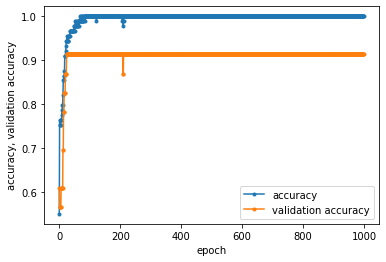

In [57]:
plt.plot(history.epoch, history.history['accuracy'],'.-', label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'],'.-', label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')
plt.legend()

### Early stopping

In [58]:
# The default monitor is "val_loss"
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

In [59]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu',),
    keras.layers.Dense(np.unique(y).shape[0], activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [60]:
history = model.fit(X_train, y_train, epochs=1000,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/3 [=========>....................] - ETA: 0s - loss: 1.0343 - accuracy: 0.7500WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fa96c5f5a70> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

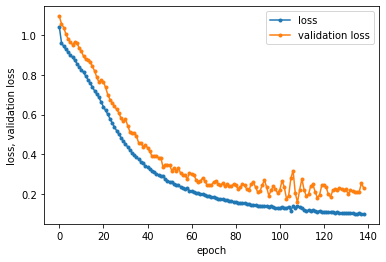

In [61]:
plt.plot(history.epoch, history.history['loss'],'.-', label='loss')
plt.plot(history.epoch, history.history['val_loss'],'.-', label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')
plt.legend()

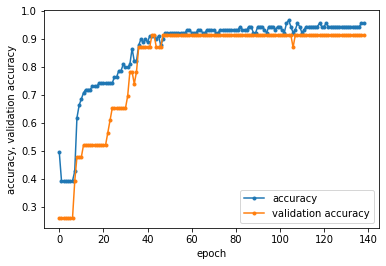

In [62]:
plt.plot(history.epoch, history.history['accuracy'],'.-', label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'],'.-', label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')
plt.legend()

### Let's check out weights and biases.

In [63]:
model.layers

In [64]:
hidden1 = model.layers[0]

In [65]:
hidden1.name

'dense_12'

### Let's put weights and biases of the first hidden layer in w1 and b1.

In [66]:
w1, b1 = hidden1.get_weights()

In [67]:
w1

array([[-0.09064305, -0.11489491, -0.10372677,  0.06981694, -0.13074689,
        -0.10586016,  0.19037473,  0.14632624, -0.0010767 ,  0.26565212,
         0.06161043, -0.04748669,  0.11605041,  0.2173242 , -0.15520531,
         0.16090067, -0.20253426, -0.16671976,  0.25059748,  0.05865558,
        -0.0685889 , -0.0311309 ,  0.0562751 ,  0.24179825,  0.04450311,
        -0.14236248,  0.13820457, -0.10370433, -0.17282233,  0.08219323,
        -0.06025746,  0.14881234, -0.19861673, -0.2104568 ,  0.08800248,
        -0.05025969, -0.14499196,  0.06244656, -0.18853037,  0.13453819,
        -0.12003261,  0.27340198, -0.11214349,  0.07274374, -0.22971512,
         0.072861  , -0.12662315, -0.12996174,  0.19232665,  0.17892197,
         0.09753171,  0.07991367,  0.03764449, -0.01948798, -0.19422051,
        -0.08717385,  0.21986903,  0.24928924,  0.07068825, -0.22466168,
        -0.1885413 ,  0.1313433 , -0.06929348, -0.17149362,  0.22830085,
         0.08197086,  0.11383541, -0.23366289, -0.1

In [68]:
w1.shape

(2, 100)

In [69]:
b1

array([ 0.        ,  0.        ,  0.        , -0.19809586,  0.        ,
        0.        ,  0.187162  , -0.20100968,  0.        , -0.15604047,
        0.26290467,  0.        , -0.214255  , -0.19127136,  0.        ,
        0.21135508,  0.        ,  0.        , -0.19935685, -0.21355788,
        0.        , -0.1577891 ,  0.252113  ,  0.23028462,  0.14339074,
        0.        ,  0.2274552 ,  0.        ,  0.        ,  0.21671037,
        0.        ,  0.26528746,  0.        ,  0.        ,  0.25999805,
        0.        ,  0.        , -0.20870191,  0.        ,  0.05685798,
        0.        , -0.09756944,  0.        ,  0.23580328,  0.        ,
       -0.2166484 ,  0.        ,  0.        ,  0.19858375,  0.19617358,
        0.2562645 ,  0.26897195, -0.20158044, -0.00655872,  0.        ,
        0.        ,  0.13562123, -0.18530123, -0.17761968,  0.        ,
        0.        ,  0.21349111,  0.        ,  0.        , -0.18260404,
       -0.19474867, -0.1997281 ,  0.        ,  0.        , -0.18

In [80]:
b1.shape

(100,)

### We can save the model and then load it as needed.

In [81]:
model.save("iris_model_final.h5")

In [82]:
model_new = keras.models.load_model("iris_model_final.h5")

In [83]:
model_new.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 303       
Total params: 10,703
Trainable params: 10,703
Non-trainable params: 0
_________________________________________________________________


### Let's try a larger dataset = the MNIST dataset.

In [1]:
import tensorflow.keras as keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

### Scale the images to 0 - 1.

In [2]:
X_train = X_train / 255.
X_test = X_test / 255.

### For now, let's use 10% of the data.

In [3]:
X_train = X_train[::10]
X_test = X_test[::10]

y_train = y_train[::10]
y_test = y_test[::10]

In [4]:
X_train.shape

(6000, 28, 28)

In [5]:
y_train.shape

(6000,)

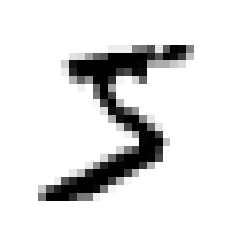

In [96]:
import matplotlib.pyplot as plt 

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

### TODO: Let's build a NN.

In [97]:
model = keras.models.Sequential()

# We need to flatten the 2d input arrays to 1d arrays.
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Add a hidden layer having 1000 neurons and ReLU.
model.add(keras.layers.Dense(1000, activation="relu"))

# Add another hidden layer having 1000 neurons and ReLU.
model.add(keras.layers.Dense(1000, activation="relu"))

# Add an output layer having "softmax" activation function. How many neurons do you need for this layer?
model.add(keras.layers.Dense(10, activation="softmax"))

### TODO: Print out the model summary and make sure things are correctly set up.

In [98]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_16 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


### Compile the model. Let's first try Stochastic Gradient Descent with learning rate of 1.0e-3.

In [99]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

### TODO: Train the model using 100 epochs and 20 % of the data in the validation dataset.

In [100]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
139/150 [==========================>...] - ETA: 0s - loss: 2.3038 - accuracy: 0.1289WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f98687fd4d0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

### TODO: Evaluate the model using the test dataset.

In [101]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.3916839361190796
Test accuracy: 0.8840000033378601


### Let's check some of the results.

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.994, 0.   ,
        0.004]], dtype=float32)

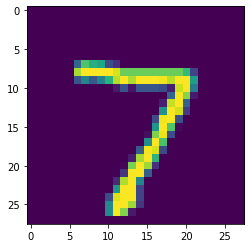

In [102]:
n = 0

# Display the image.
plt.imshow(X_test[n])

# Model prediction: probability for each class.
y_prob = model.predict(np.expand_dims(X_test[n], axis=0))
y_prob.round(3)

### The evaluation score is 88.8%, which is okay but not very impressive. Why? Can we improve the performance?

### Let's check how loss and accuracy have evolved over the training.

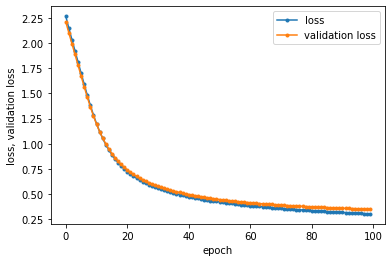

In [109]:
plt.plot(history.epoch, history.history['loss'],'.-', label='loss')
plt.plot(history.epoch, history.history['val_loss'],'.-', label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')
plt.legend()

Text(0, 0.5, 'accuracy, validation accuracy')

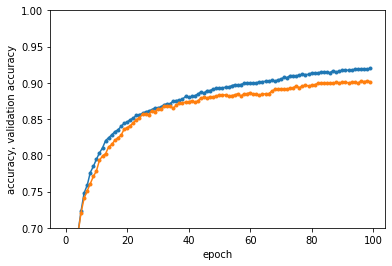

In [110]:
plt.plot(history.epoch, history.history['accuracy'],'.-', label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'],'.-', label='validation accuracy')
plt.ylim(0.7,1)
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')

### It seems like the model is still underfitting. We can increase the number of epochs or learning rate, but we can try to use the "adam" optimizer which will monitor and adjust the learning rate as the training proceeds.

In [105]:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [106]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_19 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_20 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________


In [107]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"])

In [108]:
history2 = model2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
147/150 [============================>.] - ETA: 0s - loss: 0.7991 - accuracy: 0.7393WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f9862babdd0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

In [111]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.5405932068824768
Test accuracy: 0.9470000267028809


### Let's check how loss and accuracy have evolved over the training.

Text(0, 0.5, 'loss, validation loss')

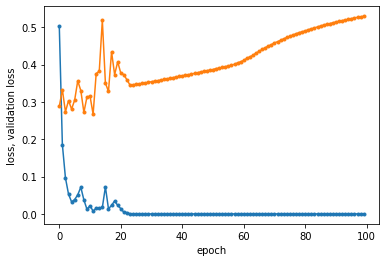

In [112]:
plt.plot(history2.epoch, history2.history['loss'],'.-', label='loss')
plt.plot(history2.epoch, history2.history['val_loss'],'.-', label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')
plt.legend()

Text(0, 0.5, 'accuracy, validation accuracy')

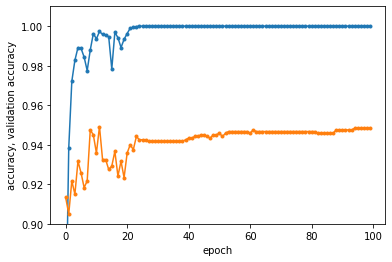

In [113]:
plt.plot(history2.epoch, history2.history['accuracy'],'.-', label='accuracy')
plt.plot(history2.epoch, history2.history['val_accuracy'],'.-', label='validation accuracy')
plt.ylim(0.9,1.01)
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')
plt.legend()

### Adam optimizer turned out to be extremely efficient! 